from azureml import Workspace
ws = Workspace(
    workspace_id='7f89bfcdbe8640cb9f81cfe9a287cd2d',
    authorization_token='R7Cm7eNchXhStqmgRWcnkya678A+kppNF9NgQQGI7n1xnmCYFMBnQ1qe5O/2bUwx3AOHXQrnt7PXLBnnwxEzAA==',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['Flight Delays Data']
frame = ds.to_dataframe()
frame.head()

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.nonparametric.smoothers_lowess as lw
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
# frame.to_csv("flight_delay.csv")

In [3]:
df = pd.read_csv("flight_delay.csv")

In [4]:
# checking datatypes
df.dtypes

Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
Carrier             object
OriginAirportID      int64
DestAirportID        int64
CRSDepTime           int64
DepDelay           float64
DepDel15           float64
CRSArrTime           int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
dtype: object

In [5]:
# check for missing data
df.count()

Unnamed: 0         2719418
Year               2719418
Month              2719418
DayofMonth         2719418
DayOfWeek          2719418
Carrier            2719418
OriginAirportID    2719418
DestAirportID      2719418
CRSDepTime         2719418
DepDelay           2691974
DepDel15           2691974
CRSArrTime         2719418
ArrDelay           2690385
ArrDel15           2719418
Cancelled          2719418
dtype: int64

In [6]:
df["Cancelled"].value_counts()

0.0    2690385
1.0      29033
Name: Cancelled, dtype: int64

In [7]:
# remove all data points with cancelled flight
df = df[df['Cancelled'] == 0]
df.count()

Unnamed: 0         2690385
Year               2690385
Month              2690385
DayofMonth         2690385
DayOfWeek          2690385
Carrier            2690385
OriginAirportID    2690385
DestAirportID      2690385
CRSDepTime         2690385
DepDelay           2690385
DepDel15           2690385
CRSArrTime         2690385
ArrDelay           2690385
ArrDel15           2690385
Cancelled          2690385
dtype: int64

In [8]:
# The dataset is for the year 2013 as the only unique value if 2013
df['Year'].unique()

array([2013], dtype=int64)

In [23]:
# drop the boolean cols depdel15 and arrdel15, also remove year as the dataset is for the year 2013. Also, we do not need
# cancelled column anymore
df1 = df.drop(["Unnamed: 0", "Year", "DepDel15", "ArrDel15", "Cancelled"], axis=1)

In [10]:
df1.dtypes

Month                int64
DayofMonth           int64
DayOfWeek            int64
Carrier             object
OriginAirportID      int64
DestAirportID        int64
CRSDepTime           int64
DepDelay           float64
CRSArrTime           int64
ArrDelay           float64
dtype: object

In [25]:
df1.head()

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
0,4,19,5,DL,11433,13303,837,-3.0,1138,1.0
1,4,19,5,DL,14869,12478,1705,0.0,2336,-8.0
2,4,19,5,DL,14057,14869,600,-4.0,851,-15.0
3,4,19,5,DL,15016,11433,1630,28.0,1903,24.0
4,4,19,5,DL,11193,12892,1615,-6.0,1805,-11.0


In [26]:
# fig = plt.figure(figsize=(10,6))
# ax = fig.gca()
# df1[df1['ArrDelay']>0].plot(kind='scatter', x='ArrDelay', y='DepDelay', ax=ax)


In [27]:
df1.count()

Month              2690385
DayofMonth         2690385
DayOfWeek          2690385
Carrier            2690385
OriginAirportID    2690385
DestAirportID      2690385
CRSDepTime         2690385
DepDelay           2690385
CRSArrTime         2690385
ArrDelay           2690385
dtype: int64

In [14]:
# Scatter plots
def scatter(df, num_cols, y):
    '''
    Make scatter plots
    arguments: df - input dataframe
                num_cols - column names where x-axis data resides (numeric data)
                y - column name where y-axis data resides (numeric data)
    '''
    
    ## loop over the columns and create scatter plot
    for col in num_cols:
        ## compute lowess fit
        los = lw.lowess(df[y], df[col], delta = 0.01 * len(df[col]))
#         print(los)
        ## create plots
        fig, ax = plt.subplots(figsize=(10,6))
        df.plot(kind='scatter', x = col, y = y, ax=ax, alpha=0.5)
        plt.plot(los[:,0], los[:,1], color='red')
        ax.set_xlabel(col)
        ax.set_ylabel(y)
#         ax.set_title()
    return 'done'

def boxplot(df, cat_cols, y):
    for col in cat_cols:
        fig = plt.figure(figsize=(10,6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = y, by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel(y)
#         fig, ax = plt.subplots(figsize=(10,6))
#         df.boxplot(column = y, by = col, ax=ax)
#         ax.set_xlabel(col)
#         ax.set_ylabel(y)
    return 'done'
# boxplot(df=df1, cat_cols=cat_cols, y='ArrDelay')        
def histogram(df, num_cols):
    for col in num_cols:
        fig = plt.figure(figsize=(10, 6))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    return 'done'
#         fig = plt.subplots(1,1, figsize=(10,6))
        
#         df.hist(bins = 30, by = col, ax=ax)
#         ax.set_xlabel(col)
#         ax.set_ylabel('Density of '+col)

def hist_cond(df, y, cols):
    for col in cols:
        fig = plt.figure(figsize=(8,6))
        fig.clf()
        ax = fig.gca()
        df[y].hist(by=df[col] ,bins=30, ax=ax)
        ax.set_title('Histogram by'+col)
#         plt.tight_layout()
    return 'done'

# Visualizations

'done'

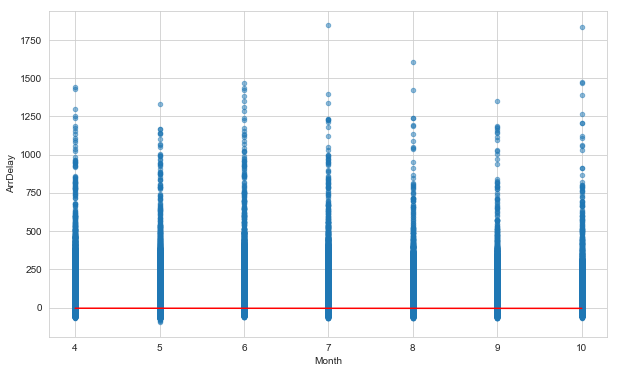

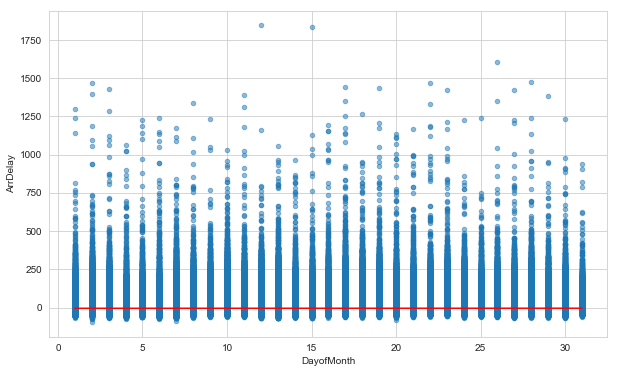

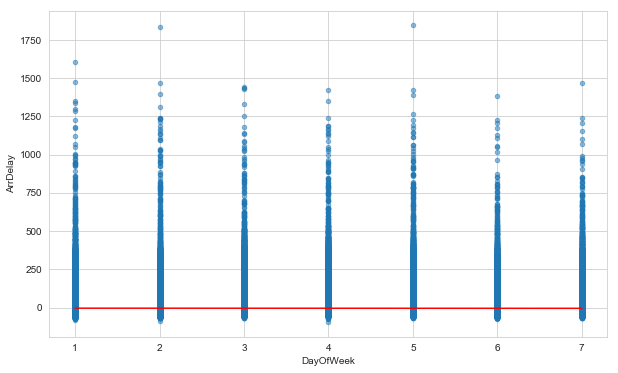

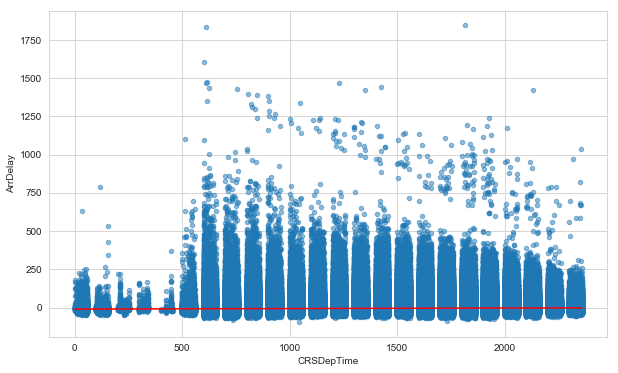

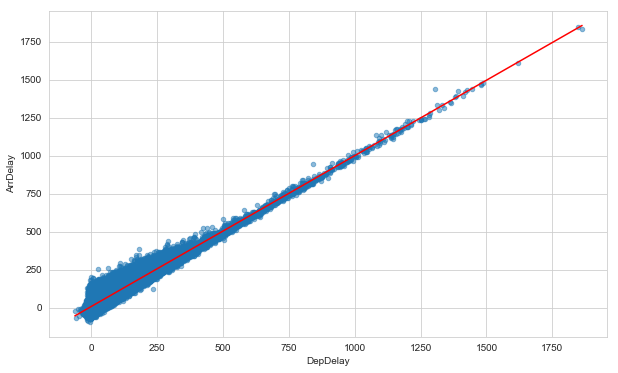

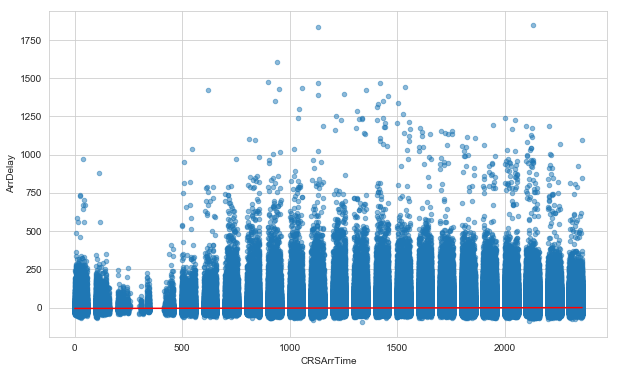

In [15]:
# Scatter Plots for numeric cols
num_cols = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'DepDelay', 'CRSArrTime']
# cols.remove('Carrier') # removing string column which will be used for bar chart
scatter(df=df1, num_cols=num_cols, y='ArrDelay')

'done'

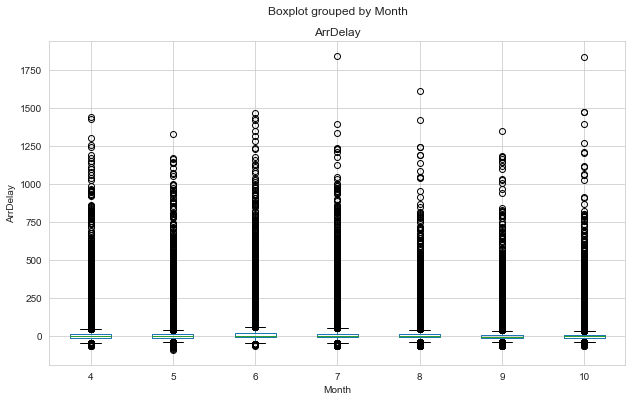

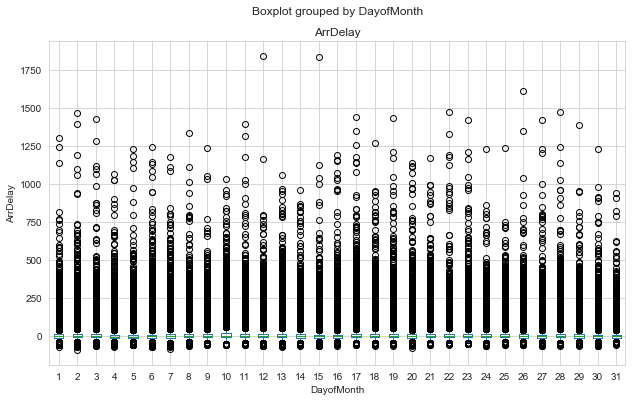

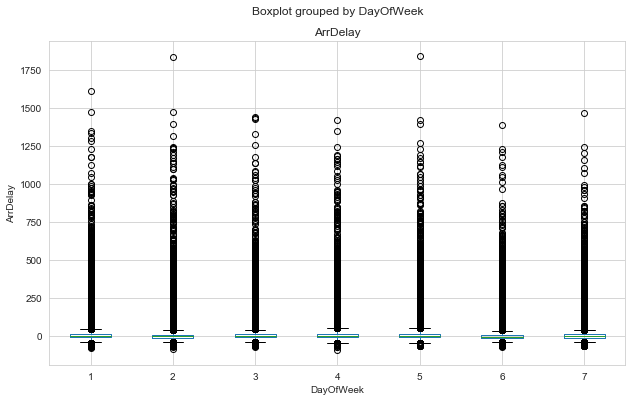

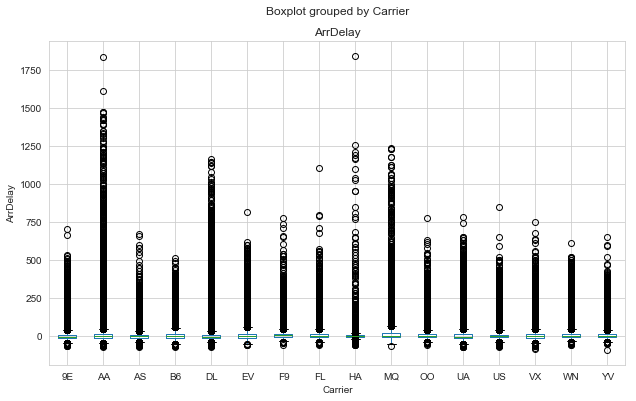

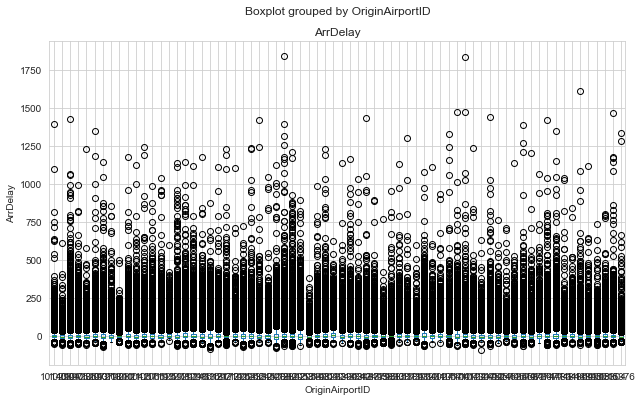

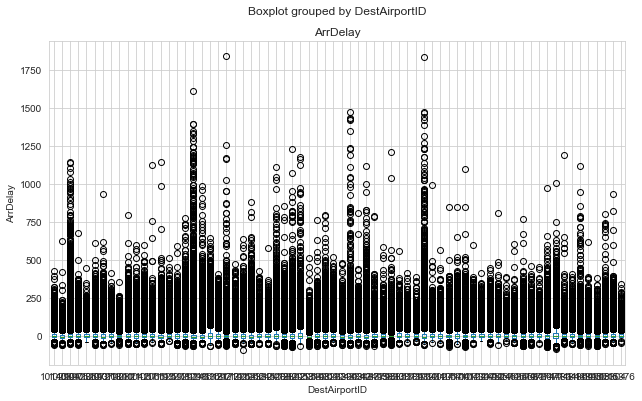

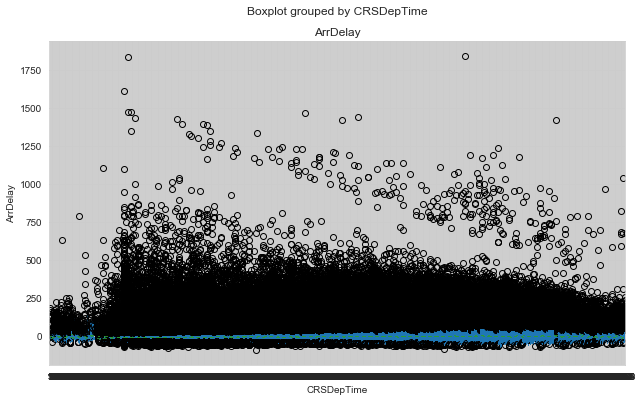

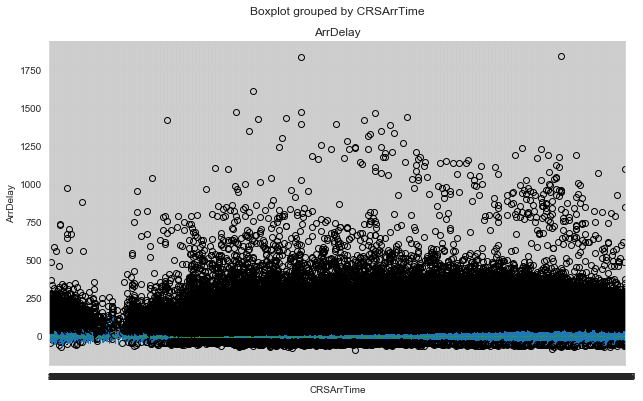

In [16]:
# boxplots (grouped by 'ArrDelay')
cat_cols = ['Month',
 'DayofMonth',
 'DayOfWeek',
 'Carrier',
 'OriginAirportID',
 'DestAirportID',
 'CRSDepTime',
 'CRSArrTime']
boxplot(df=df1, cat_cols=cat_cols, y='ArrDelay')

'done'

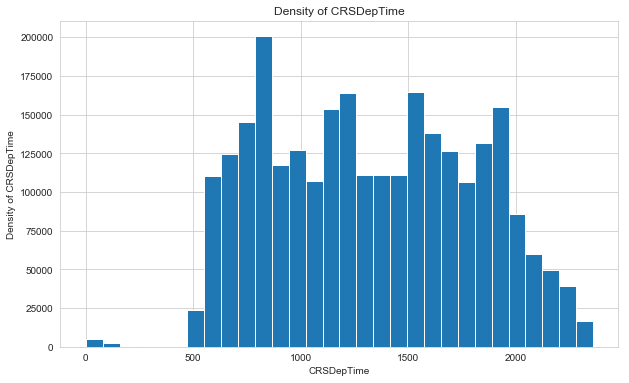

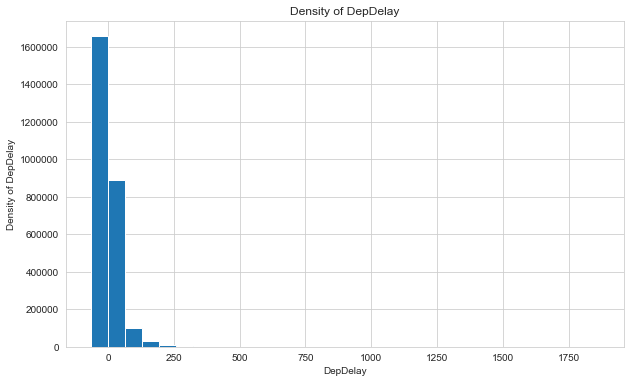

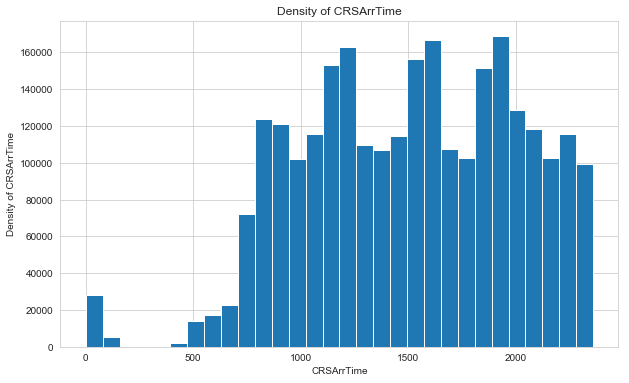

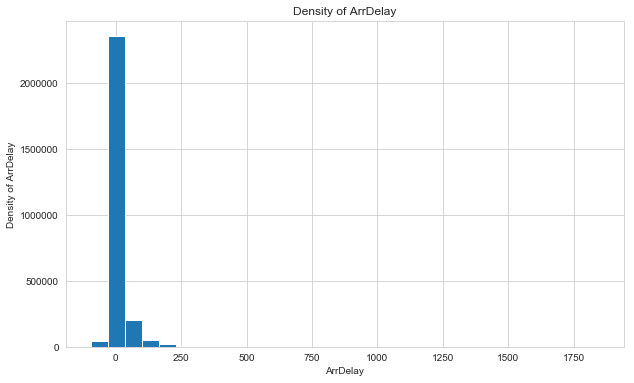

In [17]:
# Histograms
num_cols = ['CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay']
# num_cols = ['ArrDelay']
histogram(df1, num_cols)

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_core.py:2495: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ylabelsize=ylabelsize, yrot=yrot, **kwds)
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_core.py:2495: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ylabelsize=ylabelsize, yrot=yrot, **kwds)
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_core.py:2495: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ylabelsize=ylabelsize, yrot=yrot, **kwds)


'done'

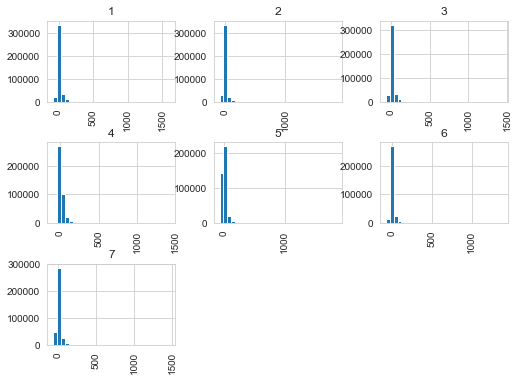

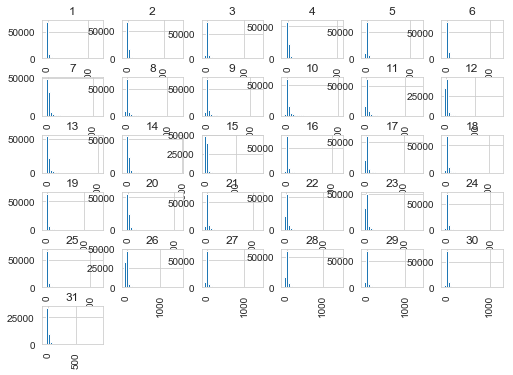

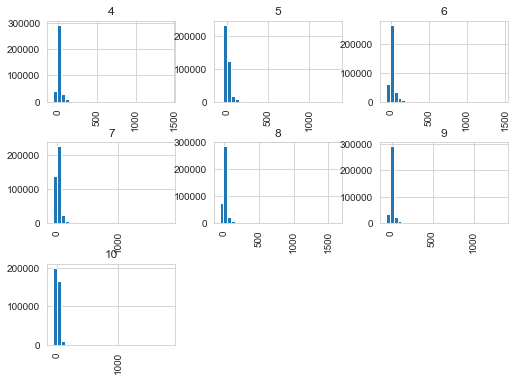

In [18]:
# 'ArrDelay' Histogram grouped by days of week, month and month iteself
num_cols = ['DayOfWeek', 'DayofMonth', 'Month']
hist_cond(df=df1, y='ArrDelay', cols= num_cols)

# Data Transformation
### Cube root
### Remove values <= 1 and perform log transformation

In [28]:
# Transforming dep and arr delay with cubic root
# df1['DepDelay'] = df1['DepDelay'].apply(lambda x: np.power(np.absolute(x), 1./3) * np.sign(x))
# df1['ArrDelay'] = df1['ArrDelay'].apply(lambda x: np.power(np.absolute(x), 1./3) * np.sign(x))

# log transformation
df2 = df1.loc[(df1['ArrDelay']>=1) & (df1['DepDelay']>=1)] # to remove all negative values (esp infinite big negatives)
df2['DepDelay'] = df2['DepDelay'].apply(lambda x: np.log(x))
df2['ArrDelay'] = df2['ArrDelay'].apply(lambda x: np.log(x))
df2['DepDelay'] = df2['DepDelay'].fillna(0)

df2.head()

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
3,4,19,5,DL,15016,11433,1630,3.332205,1903,3.178054
7,4,19,5,DL,10397,14869,2145,2.708050,2356,3.178054
8,4,19,5,DL,10397,10423,2157,3.496508,2333,3.526361
9,4,19,5,DL,11278,10397,1900,5.777652,2055,5.774552
11,4,19,5,DL,11433,11298,835,3.091042,1035,3.713572


In [29]:
df2[['DepDelay', 'ArrDelay']].describe()

,DepDelay,ArrDelay
count,815851.000000,815851.000000
mean,3.035379,2.995292
std,1.238288,1.262723
min,0.000000,0.000000
25%,2.302585,2.197225
50%,3.091042,3.044522
75%,3.912023,3.912023
max,7.529943,7.520235


'done'

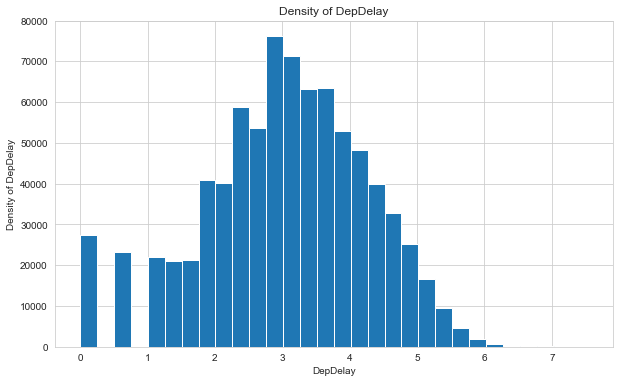

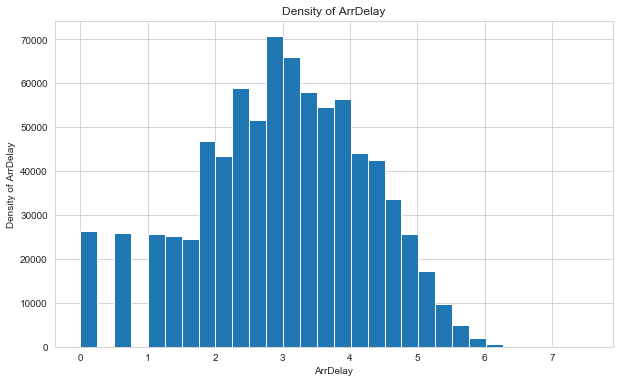

In [31]:
# Histograms after transformation
num_cols = ['DepDelay', 'ArrDelay']
histogram(df2, num_cols)

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [32]:
columns = df2.columns.tolist()
columns = columns[:-1]
columns

['Month',
 'DayofMonth',
 'DayOfWeek',
 'Carrier',
 'OriginAirportID',
 'DestAirportID',
 'CRSDepTime',
 'DepDelay',
 'CRSArrTime']

In [33]:
X = pd.get_dummies(df2[columns])
y = df2['ArrDelay'].values.reshape(-1,1)
X.head()

,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,Carrier_9E,Carrier_AA,...,Carrier_F9,Carrier_FL,Carrier_HA,Carrier_MQ,Carrier_OO,Carrier_UA,Carrier_US,Carrier_VX,Carrier_WN,Carrier_YV
3,4,19,5,15016,11433,1630,3.332205,1903,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,19,5,10397,14869,2145,2.708050,2356,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,19,5,10397,10423,2157,3.496508,2333,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,19,5,11278,10397,1900,5.777652,2055,0,0,...,0,0,0,0,0,0,0,0,0,0
11,4,19,5,11433,11298,835,3.091042,1035,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
print(X.shape)
print(y.shape)

(815851, 24)
(815851, 1)


Step 2) Split data into training and testing data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234) 

Step 3) Fit the Model to the scaled training data and make predictions using the test data

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# untrained model
model = make_pipeline(StandardScaler(), LinearRegression())
# train/fit model to training data
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Step 4) Evaluate the model fit
* Do we need to inverse transform for evaluation metrics calculation?

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# predict on test data
predictions = model.predict(X_test)
predictions_invtr = np.e**(predictions)
y_test_invtr = np.e**(y_test)
MSE = mean_squared_error(y_test_invtr, predictions_invtr)
r2 = r2_score(y_test_invtr, predictions_invtr)

print(f'MSE: {MSE} R2: {r2}')

MSE: 818.0333894436501 R2: 0.723154973549472


C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


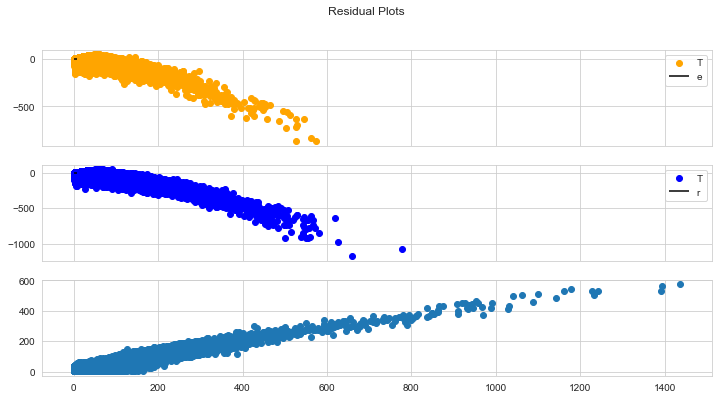

In [38]:
# plot residuals
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,6))
fig.suptitle("Residual Plots")

# testing data residuals
ax1.scatter(x = predictions_invtr, y = predictions_invtr - y_test_invtr, c="orange", label="Testing Data")
ax1.hlines(y=0, xmin=y.min(), xmax=y.max())

# training data residuals
ax2.scatter(x = np.exp(model.predict(X_train)), y = np.exp(model.predict(X_train)) - np.exp(y_train), c="blue", label="Training Data")
ax2.hlines(y=0, xmin=y.min(), xmax=y.max())

# predictions vs actual data
ax3.scatter(x = y_test_invtr, y = predictions_invtr)



Plot predicted vs the actual

In [ ]:
# import (provided) test data and test predictions
# df_test = pd.read_csv("Test-Flights.csv")
# df_test.head()

In [ ]:
# df_test.describe()